In [2]:
import sys
sys.executable

'C:\\Users\\TaniaChakraborty\\Miniconda3\\envs\\tfvenv\\python.exe'

In [3]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDatxaGenerator
from shutil import copyfile


nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [4]:
path_to_zip_file = 'C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/Cats_vs_Dogs_Images.zip'

directory_to_extract_to = 'C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_ref.close()


In [5]:
try:
    path = 'C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs'
    os.chdir(path)  #Change Directory
    #if not os.path.isfile('./file.txt'):
    if not os.path.isdir('./cats-vs-dogs'):   
        os.mkdir('cats-vs-dogs')
        os.mkdir('cats-vs-dogs/training')
        os.mkdir('cats-vs-dogs/testing')
        os.mkdir('cats-vs-dogs/training/cats')
        os.mkdir('cats-vs-dogs/training/dogs')
        os.mkdir('cats-vs-dogs/testing/cats')
        os.mkdir('cats-vs-dogs/testing/dogs')
except OSError:
    pass

In [6]:
print(len(os.listdir('C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/Cats_vs_Dogs_Images/Cats')))
print(len(os.listdir('C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/Cats_vs_Dogs_Images/Dogs')))

5928
6561


In [7]:
current_working_directory = os.getcwd()
print(current_working_directory)

print( os.listdir(current_working_directory))

C:\Users\TaniaChakraborty\Desktop\ML-Projects\Convolution Neural Networks\Cats_VS_Dogs
['.git', '.ipynb_checkpoints', 'cats-vs-dogs', 'Cats_vs_Dogs.ipynb', 'Cats_vs_Dogs_Images', 'Cats_vs_Dogs_Images.zip', 'For testing', 'tensorflow-1.9.0-cp37-cp37m-win_amd64.whl', 'venv']


In [8]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = 'C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/Cats_vs_Dogs_Images/Cats/'
DOG_SOURCE_DIR = 'C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/Cats_vs_Dogs_Images/Dogs/'

TRAINING_CATS_DIR = "C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/cats-vs-dogs/training/cats/"
TESTING_CATS_DIR = "C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/cats-vs-dogs/testing/cats/"

TRAINING_DOGS_DIR = "C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/cats-vs-dogs/training/dogs/"
TESTING_DOGS_DIR = "C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/cats-vs-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [9]:
# A linear stack of neural network layers, and perfect for the type of feed-forward CNN we're building
from keras.models import Sequential

# Keras Core Layers: layers that are used in almost any neural network
from keras.layers import Dense, Dropout, Activation, Flatten

# Keras CNN Layers: CNN layers from Keras that will help us efficiently train on image data
from keras.layers import Convolution2D as Conv2D, MaxPooling2D

# Declaring the sequential model

In [10]:
model = Sequential()

# Defining the model architecture

CNN Input Layer

In [11]:
model.add( Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)) )  # 16 = Number of filters learned
          
print(model.output_shape)



(None, 148, 148, 16)


The input shape parameter should be the shape of 1 sample. In this case, it's the same (150, 150, 3) that corresponds to  the (depth, width, height) of each digit image.

But what do the first 3 parameters represent? They correspond to the number of convolution filters to use, the number of rows in each convolution kernel, and the number of columns in each convolution kernel, respectively.

*Note: The step size is (1,1) by default, and it can be tuned using the 'subsample' parameter.

We can confirm this by printing the shape of the current model output:

In [12]:
model.add( MaxPooling2D(2, 2) )  # Max pooling is used to reduce the spatial dimensions of the output volume.

MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

In [13]:
model.add( Conv2D(32, (3, 3), activation='relu') )
model.add( MaxPooling2D(2, 2) )
model.add( Conv2D(64, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2, 2)) ) # Can also be writtens as pool_size =(2,2)

It's important to highlight the Dropout layer we just added. This is a method for regularizing our model in order to prevent overfitting.

In [14]:
model.add( Dropout(0.25) )


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


The weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer

In [15]:
model.add( Flatten() )

For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

In [16]:
#Adding a densely-connected layer with 512 units to the model
model.add( Dense(units = 128, activation='relu') )

#Adding a densely-connected layer with 1 unit to the model
model.add( Dense(units = 1, activation='sigmoid') )

# Compiling the model

When we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.).
Keras has a variety of loss functions and out-of-the-box optimizers to choose from.

In [17]:
model.compile( optimizer='rmsprop', 
               loss='binary_crossentropy', 
               metrics=['accuracy'] )



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
TRAINING_DIR = "C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/cats-vs-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/cats-vs-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 12472 images belonging to 2 classes.
Found 3366 images belonging to 2 classes.


# Trying to fit the model on training data

In [19]:
'''
`validation_steps=None`, `steps_per_epoch= None` is only valid for a generator based on the `keras.utils.Sequence` class. 
But we are using `keras.models.Sequence` so need to specify those parameters in the generator.

''' 
history = model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1, 
                              validation_data = validation_generator, 
                              validation_steps = nb_validation_samples // batch_size,
                              steps_per_epoch = nb_train_samples // batch_size, 
                               )

Epoch 1/50
125/125 [==============================] - 200s 2s/step - loss: 0.6863 - acc: 0.6080 - val_loss: 0.5608 - val_acc: 0.7205
Epoch 2/50
125/125 [==============================] - 160s 1s/step - loss: 0.5511 - acc: 0.7160 - val_loss: 0.4947 - val_acc: 0.7660
Epoch 3/50
125/125 [==============================] - 159s 1s/step - loss: 0.4974 - acc: 0.7587 - val_loss: 0.5080 - val_acc: 0.7569
Epoch 4/50
125/125 [==============================] - 163s 1s/step - loss: 0.4533 - acc: 0.7865 - val_loss: 0.4007 - val_acc: 0.8180
Epoch 5/50
125/125 [==============================] - 158s 1s/step - loss: 0.4158 - acc: 0.8087 - val_loss: 0.3652 - val_acc: 0.8402
Epoch 6/50
125/125 [==============================] - 154s 1s/step - loss: 0.3758 - acc: 0.8280 - val_loss: 0.3228 - val_acc: 0.8639
Epoch 7/50
125/125 [==============================] - 158s 1s/step - loss: 0.3406 - acc: 0.8488 - val_loss: 0.2847 - val_acc: 0.8818
Epoch 8/50
125/125 [==============================] - 159s 1s/step - 

<Figure size 432x288 with 0 Axes>

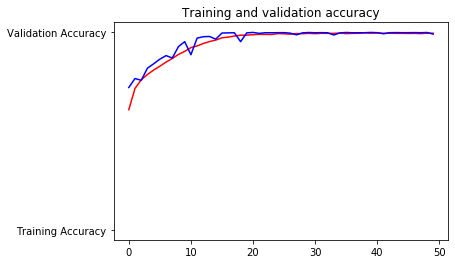

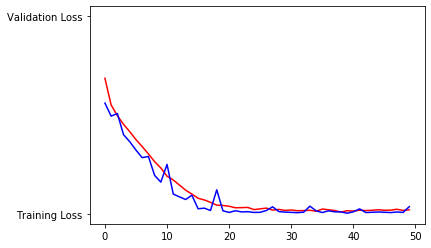

<Figure size 432x288 with 0 Axes>

In [22]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

1. cv_img_2.shape:  (150, 150, 3)
x.shape:  (1, 150, 150, 3)
2. cv_img_2.shape:  (150, 150, 3)
images.shape:  (1, 150, 150, 3)
[0.]
This one is a CAT 


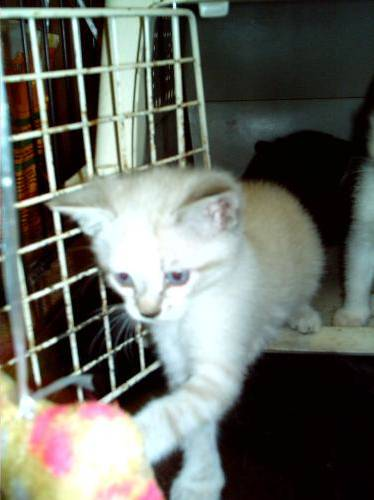

1. cv_img_2.shape:  (150, 150, 3)
x.shape:  (1, 150, 150, 3)
2. cv_img_2.shape:  (150, 150, 3)
images.shape:  (1, 150, 150, 3)
[1.]
This one is a DOG 


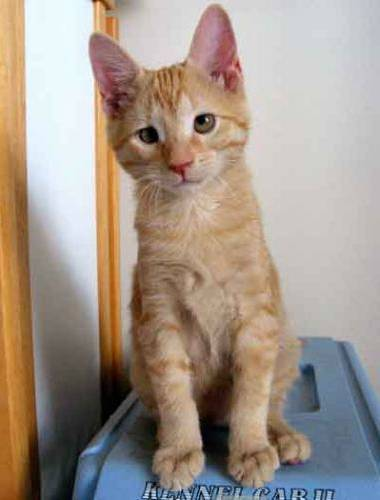

1. cv_img_2.shape:  (150, 150, 3)
x.shape:  (1, 150, 150, 3)
2. cv_img_2.shape:  (150, 150, 3)
images.shape:  (1, 150, 150, 3)
[1.]
This one is a DOG 


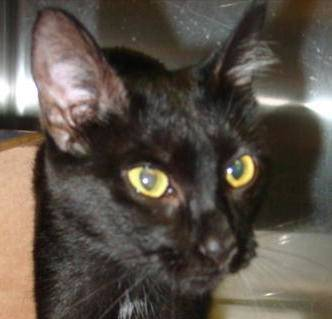

1. cv_img_2.shape:  (150, 150, 3)
x.shape:  (1, 150, 150, 3)
2. cv_img_2.shape:  (150, 150, 3)
images.shape:  (1, 150, 150, 3)
[1.]
This one is a DOG 


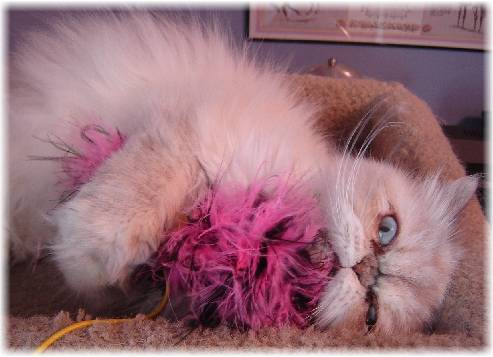

1. cv_img_2.shape:  (150, 150, 3)
x.shape:  (1, 150, 150, 3)
2. cv_img_2.shape:  (150, 150, 3)
images.shape:  (1, 150, 150, 3)
[0.]
This one is a CAT 


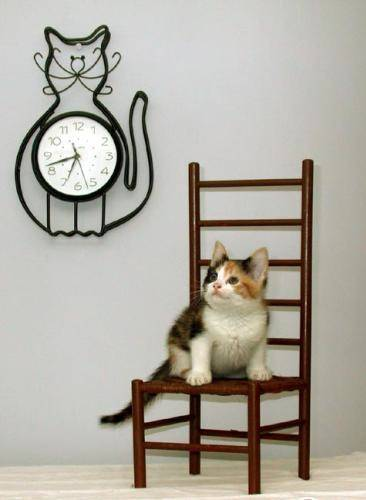

1. cv_img_2.shape:  (150, 150, 3)
x.shape:  (1, 150, 150, 3)
2. cv_img_2.shape:  (150, 150, 3)
images.shape:  (1, 150, 150, 3)
[1.]
This one is a DOG 


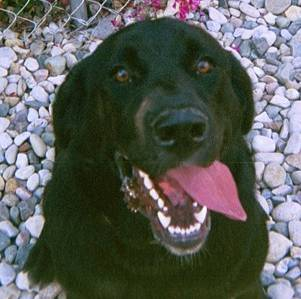

1. cv_img_2.shape:  (150, 150, 3)
x.shape:  (1, 150, 150, 3)
2. cv_img_2.shape:  (150, 150, 3)
images.shape:  (1, 150, 150, 3)
[1.]
This one is a DOG 


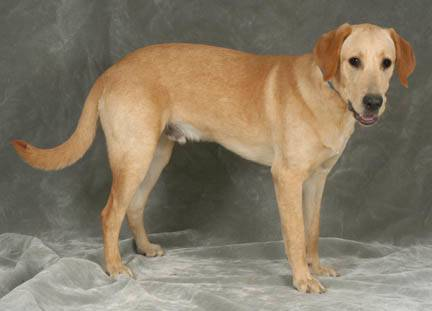

1. cv_img_2.shape:  (150, 150, 3)
x.shape:  (1, 150, 150, 3)
2. cv_img_2.shape:  (150, 150, 3)
images.shape:  (1, 150, 150, 3)
[1.]
This one is a DOG 


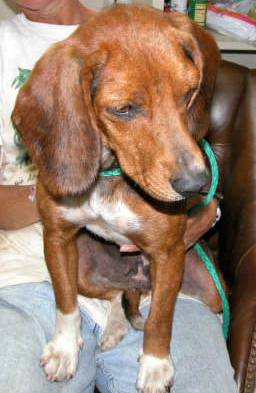

1. cv_img_2.shape:  (150, 150, 3)
x.shape:  (1, 150, 150, 3)
2. cv_img_2.shape:  (150, 150, 3)
images.shape:  (1, 150, 150, 3)
[1.]
This one is a DOG 


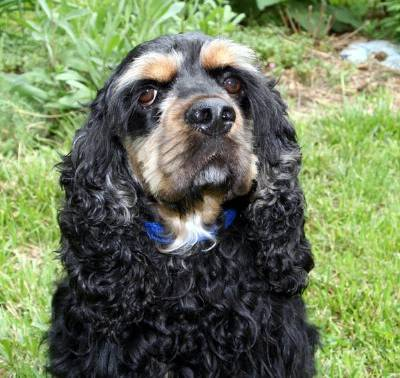

In [25]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
from IPython.display import Image, display

import numpy as np
#from google.colab import files
import glob
import cv2
from keras.preprocessing import image

#uploaded = files.upload()
cv_img = []
for img in glob.glob("C:/Users/TaniaChakraborty/Desktop/ML-Projects/Convolution Neural Networks/Cats_VS_Dogs/For testing/*.jpg"):
  # predicting images
  # path = '/content/' + fn
  #img = image.load_img(path, target_size=(150, 150))
  cv_img_1= cv2.imread(img)
  cv_img_2 = cv2.resize(cv_img_1, (150, 150))
  print("1. cv_img_2.shape: ", cv_img_2.shape)

  x = image.img_to_array(cv_img_2)
  x = np.expand_dims(x, axis=0)
  print("x.shape: ", x.shape)

  print("2. cv_img_2.shape: ", cv_img_2.shape)

  images = np.vstack([x])
  print("images.shape: ", images.shape)
    
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    #cv2.imshow("DOG: ", cv_img_1)
    print("This one is a DOG ")
    display(Image(filename=img))

  else:
    #cv2.imshow("CAT: ", cv_img_1)
    print("This one is a CAT ")
    display(Image(filename=img))
